![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [65]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [66]:
# Here you run your code to explore the data
imdb_names = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
imdb_titles_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
imdb_titles_akas = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz')
imdb_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
bom_gross_earnings = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
moviedb_movies = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
rt_reviews = pd.read_csv('data/zippedData/rt.reviews.tsv.gz', delimiter = '\t', encoding = 'unicode_escape')
rt_movies = pd.read_csv('data/zippedData/rt.movie_info.tsv.gz', delimiter = '\t', encoding = 'unicode_escape')
imdb_crew = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
imdb_principals = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')

In [67]:
imdb_titles_basics.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [68]:
imdb_titles_basics.shape


(146144, 6)

In [69]:
imdb_titles_akas.head()


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [70]:
imdb_titles_akas.shape


(331703, 8)

In [71]:
imdb_ratings.head()


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [72]:
imdb_ratings.shape


(73856, 3)

In [73]:
imdb_crew.head()


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [74]:
imdb_crew.shape


(146144, 3)

In [75]:
imdb_principals.head()


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [76]:
imdb_principals.shape


(1028186, 6)

In [77]:
bom_gross_earnings.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [78]:
bom_gross_earnings.shape


(3387, 5)

In [79]:
budgets.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [80]:
budgets.shape

(5782, 6)

In [81]:
moviedb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [82]:
moviedb_movies.shape

(26517, 10)

In [83]:
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [84]:
rt_reviews.shape

(54432, 8)

In [85]:
rt_movies.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [86]:
rt_movies.shape

(1560, 12)

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [87]:
# Standardize movie titles across dataframes. 
budgets['movie'] = budgets['movie'].str.replace(' ', '_').str.lower().str.replace('[^\w\s]','')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",pirates_of_the_caribbean_on_stranger_tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",dark_phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",avengers_age_of_ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",star_wars_ep_viii_the_last_jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [88]:
moviedb_movies['title'] = moviedb_movies['title'].str.replace(' ', '_').str.lower().str.replace('[^\w\s]','')
moviedb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,harry_potter_and_the_deathly_hallows_part_1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,how_to_train_your_dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,iron_man_2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,toy_story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,inception,8.3,22186


In [89]:
 budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [90]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [91]:
moviedb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [92]:
moviedb_movies.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [93]:
moviedb_movies.duplicated().sum()

0

In [94]:
budgets.duplicated().sum()

0

In [95]:
# Change release date column into DateTime format. 
budgets['release_date'] = pd.to_datetime(budgets['release_date'])
budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,pirates_of_the_caribbean_on_stranger_tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [96]:
moviedb_movies['release_date'] = pd.to_datetime(moviedb_movies['release_date'])
moviedb_movies.head(2)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,harry_potter_and_the_deathly_hallows_part_1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,how_to_train_your_dragon,7.7,7610


## Data Modeling
Describe and justify the process for analyzing or modeling the data.
***
Questions to consider:

* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?

In [97]:
# Here you run your code to model the data
# Here you run your code to model the data
# Research Question 1: What release months contain the most popular movies on the Movie DB data? 

# Make another column ("month") containing just the month from the "release_date" column. 
moviedb_movies["month"] = moviedb_movies["release_date"].dt.month
moviedb_movies.head()

clean_moviedb = moviedb_movies.drop(columns = ['Unnamed: 0', 'id', 'original_language', 'original_title'], axis = 1)

# clean_moviedb_count = clean_moviedb.groupby(by = ['month']).agg(['count'])

# clean_moviedb_count

In [98]:
# Change datatype of ['month'] column to string
clean_moviedb['month'] = clean_moviedb['month'].astype('str')

# Enumerate to replace values in ['month'] with names of months 

for i, element in enumerate(clean_moviedb['month']): 
    if element == '1':
        clean_moviedb['month'][i] = 'January'
        # intakes.at[i, 'age_upon_intake_unit'] = 365
    elif element == '2': 
        clean_moviedb['month'][i] = 'February'
    elif '3' in element: 
        clean_moviedb['month'][i] = 'March'
    elif '4' in element: 
        clean_moviedb['month'][i] = 'April' 
    elif '5' in element:
        clean_moviedb['month'][i] = 'May'
        # intakes.at[i, 'age_upon_intake_unit'] = 365
    elif '6' in element: 
        clean_moviedb['month'][i] = 'June'
    elif '7' in element: 
        clean_moviedb['month'][i] = 'July'
    elif '8' in element: 
        clean_moviedb['month'][i] = 'August'    
    elif '9' in element:
        clean_moviedb['month'][i] = 'September'
        # intakes.at[i, 'age_upon_intake_unit'] = 365
    elif '10' in element: 
        clean_moviedb['month'][i] = 'October'
    elif '11' in element: 
        clean_moviedb['month'][i] = 'November'
    elif '12' in element: 
        clean_moviedb['month'][i] = 'December' 
        
clean_moviedb.head()

<ipython-input-98-d41c67345e7a>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_moviedb['month'][i] = 'November'
<ipython-input-98-d41c67345e7a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_moviedb['month'][i] = 'March'
<ipython-input-98-d41c67345e7a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_moviedb['month'][i] = 'May'
<ipython-input-98-d41c67345e7a>:22: SettingWithCopyWarning: 
A value is trying to be

,genre_ids,popularity,release_date,title,vote_average,vote_count,month
0,"[12, 14, 10751]",33.533,2010-11-19,harry_potter_and_the_deathly_hallows_part_1,7.7,10788,November
1,"[14, 12, 16, 10751]",28.734,2010-03-26,how_to_train_your_dragon,7.7,7610,March
2,"[12, 28, 878]",28.515,2010-05-07,iron_man_2,6.8,12368,May
3,"[16, 35, 10751]",28.005,1995-11-22,toy_story,7.9,10174,November
4,"[28, 878, 12]",27.920,2010-07-16,inception,8.3,22186,July


In [99]:
clean_moviedb['month'].value_counts()

January      3132
October      3035
April        2566
March        2406
November     2338
September    2264
June         2166
December     1929
May          1865
August       1698
February     1614
July         1504
Name: month, dtype: int64

In [100]:
clean_moviedb['popularity'].mean()

3.130912244974922

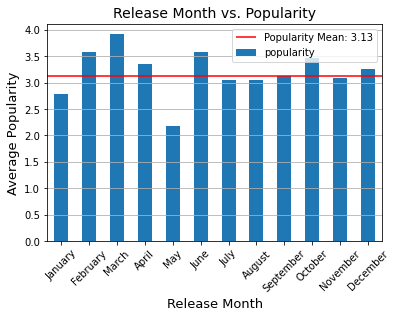

In [101]:
#Plot by Month and Average Popularity to figure out the most popular month to release movies. 

#Make the group of the data according to their release month, find the mean popularity related to this, and plot.
from matplotlib import pyplot as plt
clean_moviedb.groupby('month')['popularity'].mean().plot(kind = 'bar')

#Set up the title of the graph. 
plt.title("Release Month vs. Popularity",fontsize = 14)

#Setup the x-axis label and y-axis label of the graph.
plt.xlabel('Release Month',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)
axes = plt.gca()
axes.yaxis.grid()

#Insert mean popularity
plt.hlines(y=clean_moviedb['popularity'].mean(),xmin=-.5, xmax=11.5,color='red',
           label=f"Popularity Mean: {clean_moviedb['popularity'].mean():.2f}") 

# Change x-axis tick labels to display names (not numbers) of months. 
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],rotation=45)  # Set text labels and properties.
plt.legend()
plt.show()

Describe chart 
- most popular
- least popular

What's driving the trend we're seeing? 
May? 

- Compare to count of movies by month / how many movies are getting released? double y-axis? 

In [102]:
imdb_titles_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [103]:
imdb_titles_basics.shape

(146144, 6)

In [104]:
imdb_titles_basics['genres'].value_counts()

Documentary                      32185
Drama                            21486
Comedy                            9177
Horror                            4372
Comedy,Drama                      3519
                                 ...  
History,Sci-Fi,Thriller              1
Family,Sci-Fi,Thriller               1
Comedy,Sci-Fi,Western                1
Animation,Crime,Mystery              1
Animation,Documentary,Mystery        1
Name: genres, Length: 1085, dtype: int64

In [105]:
imdb_titles_basics['genres'].unique()

array(['Action,Crime,Drama', 'Biography,Drama', 'Drama', ...,
       'Music,Musical,Reality-TV', 'Animation,Crime',
       'Adventure,History,War'], dtype=object)

In [106]:
imdb_titles_basics['genres'].isna().sum()

5408

In [107]:
imdb_titles_basics['genres'].isna().sum()/len(imdb_titles_basics)

0.037004598204510616

In [108]:
imdb_titles_basics['genres'] = imdb_titles_basics['genres'].fillna("Unknown")

In [109]:
# Get a unique genres list. 
unique_genres_list = []
for genre_details in imdb_titles_basics['genres']: 
    genres_list = genre_details.split(",")
    for genre in genres_list: 
        unique_genres_list.append(genre)

unique_genres_list = sorted(list(set(unique_genres_list)))

In [110]:
unique_genres_list

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'Unknown',
 'War',
 'Western']

In [111]:
# Create columns for each unique genre
for genre in unique_genres_list: 
    imdb_titles_basics[genre]=0

In [112]:
imdb_titles_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
# Use a loop to populate those genre columns
for index, genre_details in enumerate(imdb_titles_basics['genres']): 
    for genre in unique_genres_list: 
        if genre in genre_details: 
            #If a genre is in te genres column for that row, it'll add a 1 to that genre's column
            imdb_titles_basics.at[index,genre] = 1
            # This is the same as imdb[genre][index] = 1, but pandas like .at more than using the above syntax

In [114]:
imdb_titles_basics.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
# Preparing to join imdb_titles_basics wtih budgets dataframe
# Budgets dataframe titles already reformatted; need to do the same with imdb_titles_basics
imdb_titles_basics['primary_title'] = imdb_titles_basics['primary_title'].str.replace(' ', '_').str.lower().str.replace('[^\w\s]','')
imdb_titles_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
0,tt0063540,sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,one_day_before_the_rainy_season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,the_other_side_of_the_wind,The Other Side of the Wind,2018,122.0,Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,sabse_bada_sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,the_wandering_soap_opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
# Drop unneeded columns in IMDB dataframe and rename because it's annoying
imdb = imdb_titles_basics.drop(columns = ['original_title', 'runtime_minutes'])
imdb.head()

,tconst,primary_title,start_year,genres,Action,Adult,Adventure,Animation,Biography,Comedy,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
0,tt0063540,sunghursh,2013,"Action,Crime,Drama",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,one_day_before_the_rainy_season,2019,"Biography,Drama",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,the_other_side_of_the_wind,2018,Drama,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,sabse_bada_sukh,2018,"Comedy,Drama",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,the_wandering_soap_opera,2017,"Comedy,Drama,Fantasy",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [117]:
#Sort by tconst identifier to see if that gives movies in order 
imdb = imdb.sort_values(by=['primary_title'])
imdb.head(30)

,tconst,primary_title,start_year,genres,Action,Adult,Adventure,Animation,Biography,Comedy,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
112668,tt6608094,,2017,Unknown,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4642,tt10423688,,2019,"Fantasy,Sci-Fi",0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
107424,tt6290346,,2013,"Crime,Documentary",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
915,tt10057838,,2017,Unknown,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
139783,tt9046926,0000_a_shark_odyssey,2018,"Animation,Comedy,Musical",0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
145395,tt9811798,0009_the_sharks_make_contact,2019,"Animation,Comedy,Musical",0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3174,tt10315070,0010_the_sharks_make_contact__part_2,2020,"Animation,Comedy,Sci-Fi",0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
80160,tt4602074,001_trolling,2017,Comedy,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
114625,tt6783970,003_seconde,2017,Documentary,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56179,tt3283768,006_kaçis,2014,"Action,Comedy",1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [143]:
# Check for rows with duplicate titles and years in IMDB dataframe 
imdb_dupes = imdb.loc[imdb.duplicated(subset=['primary_title', 'start_year'], keep=False) == True]

In [144]:
imdb_dupes.shape

(4290, 32)

In [145]:
imdb_dupes.tail()

,tconst,primary_title,start_year,genres,Action,Adult,Adventure,Animation,Biography,Comedy,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
66991,tt3815126,ângelo_de_sousa__tudo_o_que_sou_capaz,2010,"Biography,Documentary",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
66990,tt3815124,ângelo_de_sousa__tudo_o_que_sou_capaz,2010,"Biography,Documentary",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
66989,tt3815122,ângelo_de_sousa__tudo_o_que_sou_capaz,2010,"Biography,Documentary",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
109103,tt6412726,çagrilan,2016,Unknown,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
92592,tt5352034,çagrilan,2016,Horror,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,pirates_of_the_caribbean_on_stranger_tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,dark_phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,avengers_age_of_ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,star_wars_ep_viii_the_last_jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [64]:
print(imdb.shape)
print(budgets.shape)

(146144, 32)
(5782, 6)


In [ ]:
# Create a year - title column so that reduces duplicates 
imdb['year_title'] = imdb['primary_title'] + " " + imdb['start_year'].astype('str')

In [66]:
imdb_star_wars = imdb.loc[imdb['primary_title'].str.contains("star_wars")]

In [69]:
budgets_star_wars = budgets.loc[budgets['movie'].str.contains("star_wars")]

In [70]:
print(imdb_star_wars.shape)
print(budgets_star_wars.shape)

(28, 32)
(11, 6)


In [71]:
test_join = pd.merge(
    imdb_star_wars,
    budgets_star_wars,
    how='inner',
    left_on="primary_title",
    right_on="movie")

In [73]:
len(test_join)

2

In [74]:
test_join

,tconst,primary_title,start_year,genres,Action,Adult,Adventure,Animation,Biography,Comedy,...,Thriller,Unknown,War,Western,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt3748528,rogue_one_a_star_wars_story,2016,"Action,Adventure,Sci-Fi",1,0,1,0,0,0,...,0,0,0,0,45,2016-12-16,rogue_one_a_star_wars_story,"$200,000,000","$532,177,324","$1,049,102,856"
1,tt3778644,solo_a_star_wars_story,2018,"Action,Adventure,Fantasy",1,0,1,0,0,0,...,0,0,0,0,12,2018-05-25,solo_a_star_wars_story,"$275,000,000","$213,767,512","$393,151,347"


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***